In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
##      Feature extraction
from skimage.feature import hog
from skimage.feature import *
##        Classifiers:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
img = cv2.imread("./Datasets/day_color(large sample)/6.jpg")
img1 = img.copy()
img2 = img.copy()
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.equalizeHist(img)
img = cv2.bilateralFilter(img, 11, 17, 17)
plt.figure(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.axis("off")

(-0.5, 599.5, 449.5, -0.5)

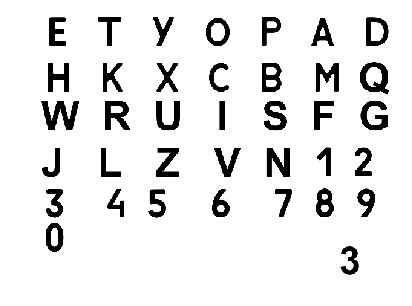

In [19]:
train = cv2.imread('TRAINING.png') #Loading of training set
train_sh = train.copy() #sh = show - copy of image for counters drawing 
train = cv2.cvtColor(train, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,5))
plt.imshow(train, cmap="gray")
plt.axis("off")

In [20]:
#test = cv2.imread('TESTTEST2.png') # - Loading of test sample from separate image.
#test_sh = test.copy()
#test = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)
#plt.figure(figsize=(10,5))
#plt.imshow(test, cmap="gray")
#plt.axis("off")

(-0.5, 599.5, 449.5, -0.5)

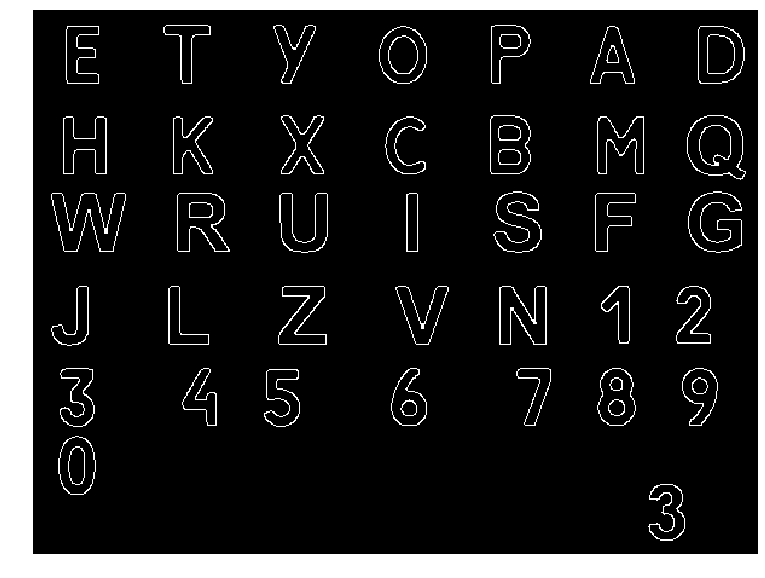

In [21]:
edged_train = cv2.Canny(train, 500, 500) # - Transformation of training image into binary image with the help of Canny edges. 
#plt.figure(figsize=(20,10)) 
#plt.imshow(edged_train, cmap="gray")
#plt.axis("off")
#edged_test = cv2.Canny(test, 170, 200) # - Transformation of test image into binary image with the help of Canny edges. Required only if testing sample is in separate file.
#plt.figure(figsize=(10,5))
#plt.imshow(edged_test, cmap="gray")
#plt.axis("off")
#Morphology - helps to get bold and contrast lines. See more in theoretical part of the report
fig = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
edged_train = cv2.morphologyEx(edged_train, cv2.MORPH_CLOSE, fig)
edged_test = cv2.morphologyEx(edged_test, cv2.MORPH_CLOSE, fig)
plt.figure(figsize=(20,10))
plt.imshow(edged_train, cmap="gray")
plt.axis("off")
#plt.figure(figsize=(10,5))
#plt.imshow(edged_test, cmap="gray")
#plt.axis("off")

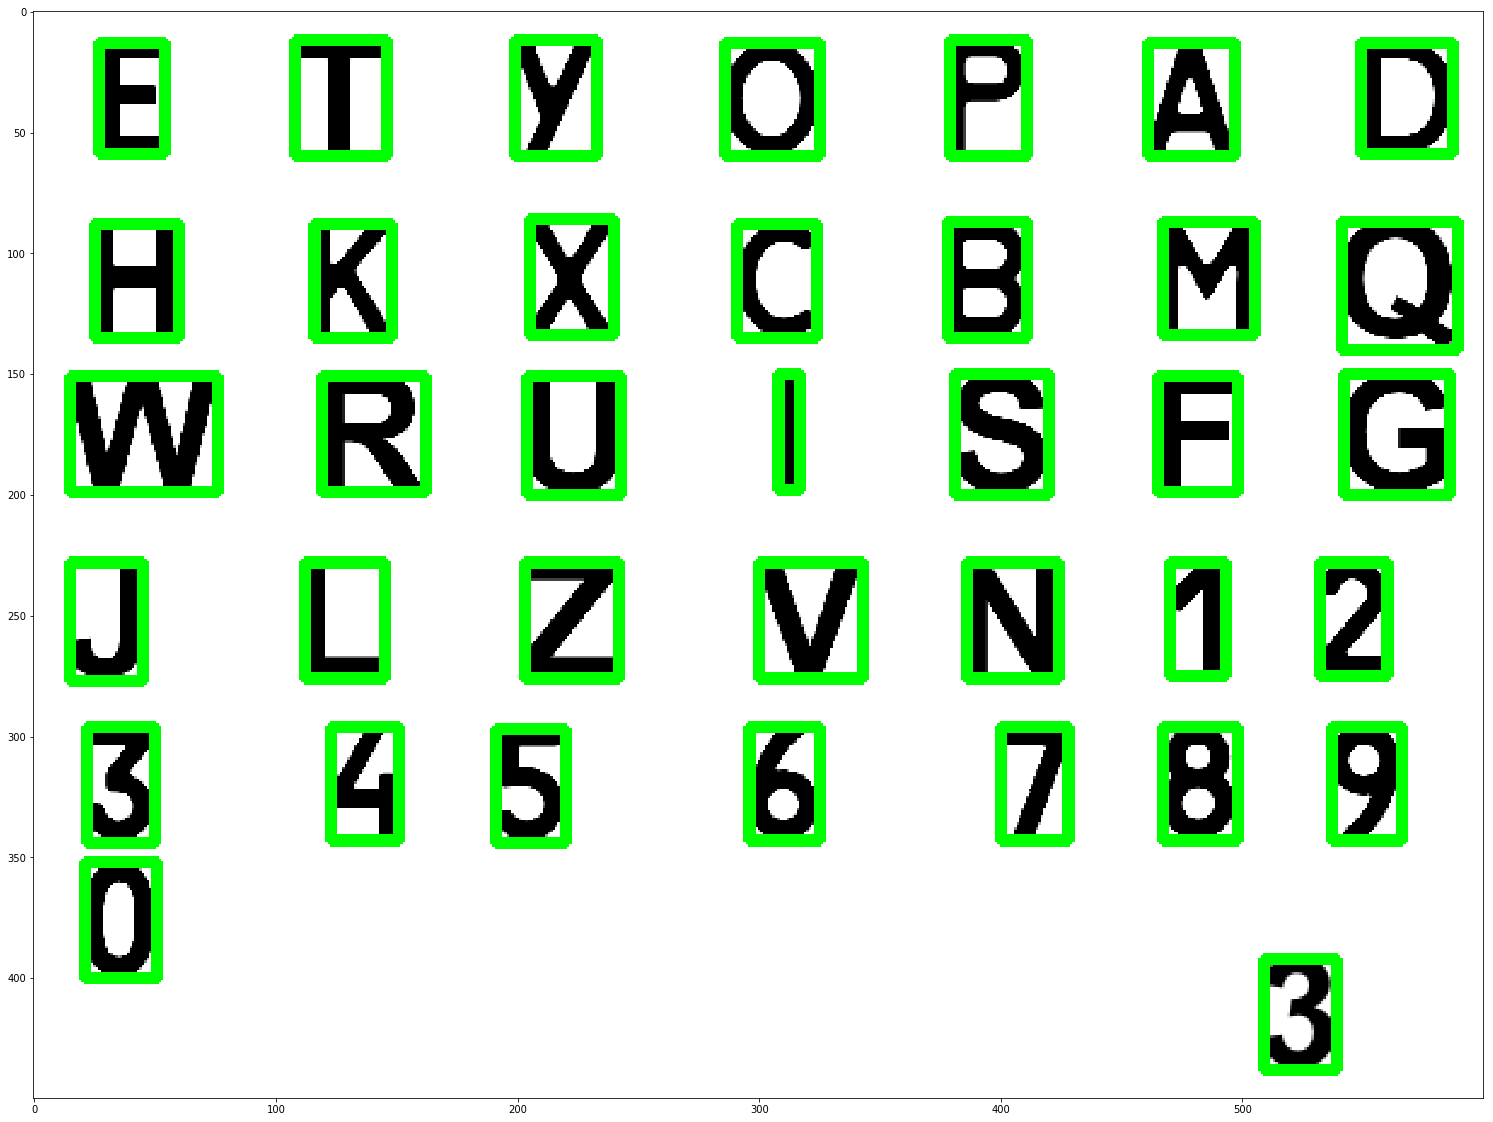

In [28]:
#Getting contours of data in test images (contours of each character stored there)
contrtrain = cv2.findContours(edged_train, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contrtrain = contrtrain[0]
#Visualisation of contours
for contour in contrtrain:
    rect = cv2.minAreaRect(contour)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(train_sh,[box],0,(0,255,0),4)
#contrtest = cv2.findContours(edged_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contrtest = contrtest[0]
#for contour in contrtest:
 #   rect = cv2.minAreaRect(contour)
  #  box = np.int0(cv2.boxPoints(rect))
  #  cv2.drawContours(test_sh,[box],0,(0,255,0),2)
#labels = ['7','5','8','6','4','3','2','1','H','F','E','D','B','A','G','C'] # - Labels from original simplifies test
#Labels for training data
labels = ['3','0', '5', '7', '6', '3', '9', '4', '8', '2', '1', 'N', 'V', 'Z', 'L', 'J', 'F', 'I', 'U', 'R', 'W', 'G', 'S', 'C', 'M', 'K', 'H', 'Q', 'B', 'X', 'D', 'A', 'O', 'E', 'P', 'Y', 'T']
hogs_features_train = []
hogs_features_test = []
#Finds space which each character takes on image and then uses it as a mask to cut out piece with character from training image
for c in contrtrain:
    (x, y, w, h) = cv2.boundingRect(c) #Finds x,y-position of center of the contour
    roi = edged_train[y:y + h, x:x + w] #Finds region of interest, which is place taken by character
    roi = cv2.resize(roi,(27,46)) #Applies mask and cuts out a piece with character
    #Feature extraction by histograms of oriented gradients. More info in report.
    hogs_features_train.append(hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=False)) 
xs = []
#Does the same with test data
for c in contrtest:
    (x, y, w, h) = cv2.boundingRect(c)
    xs.append(x)
    roi = edged_test[y:y + h, x:x + w]
    roi = cv2.resize(roi,(27,46))
    hogs_features_test.append(hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=False))
plt.figure(figsize=(40,20))
plt.imshow(train_sh)
#plt.figure(figsize=(20,10))
#plt.imshow(test_sh)

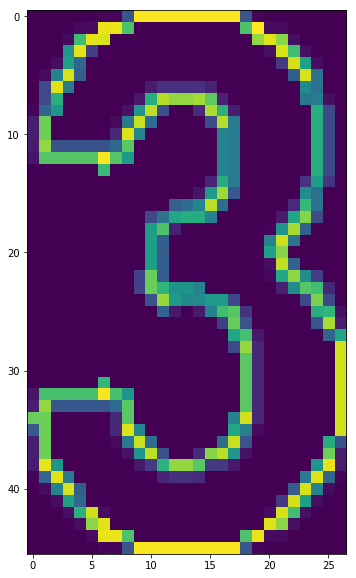

In [29]:
#Piece of code below was used to determine which index of contour belongs to wich character
#plt.figure(figsize=(20,10))
#plt.imshow(rois_test[1])
#plt.figure(figsize=(20,10))
#plt.imshow(rois_train[0])

In [35]:
print(np.size(np.size(hogs_features_test)))

[]


In [7]:
#Application of classifiers
clfs = [KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),BernoulliNB(),SVC(gamma='auto'),LinearSVC()]
anss = []
for clf in clfs:
    clf.fit(hogs_features_train,labels)
    ans = clf.predict(hogs_features_test)
    anss.append(ans)
    print(ans)

<b>Data from testing - Linear SVC was confirmed to be the most suitable</b> <br>
<b>Experiment 1:</b> <br> 
<b>Params:</b> 16 x 16 pixels per cell, 1 x 1 cells per block, orientation: 9 <br>
<b>Results: </b> <br>
['5' '5' '3' '1' '2' '3' '3'] - kNN - <b>Low performance!</b> <br>
['B' 'E' '5' 'D' '2' '3' 'B'] - GaussianNB <br>
['G' 'B' '8' 'D' '2' 'C' '3'] - D3 - <b>Low performance!</b> <br>
['A' 'A' 'E' 'D' '2' 'A' 'A'] - BNB - <b>Low performance!</b> <br>
['B' 'B' '5' 'D' '2' '3' '3'] - SVC <br>
['B' 'B' '5' 'D' '2' '3' '3'] - Linear SVC <br>
<b>Notes:</b> E was recognized as "3" due to blurred image. Additional "blurred" training set might be loaded.<br> 

<b>Experiment 2:</b> <br> 
<b>Params:</b> 8 x 8 pixels per cell, 1 x 1 cells per block, orientation: 9 <br>
<b>Results: </b> <br>
['3' 'A' '3' 'A' '2' '3' '3'] - kNN - <b>Low performance!</b> <br>
['B' 'B' '5' 'D' '2' '3' '3'] - GaussianNB <b>All digites were recognized!</b><br> 
['8' 'E' '4' '3' '2' '3' 'G'] - D3 - <b>Low performance!</b> <br>
['B' 'E' '5' 'D' '2' '3' '3'] - BNB - <b>All digites were recognized!</b><br>
['B' 'E' '5' 'D' '2' '3' 'B'] - SVC <b>All digites were recognized!</b><br>
['B' 'E' '5' 'D' '2' '3' 'B'] - Linear SVC <b>All digites were recognized!</b><br>
<b>Notes:</b> 

In [8]:
#Sorting of characters so they match their positions on test image
indexes = [i for i in range(len(xs))]
newmat = np.column_stack([xs,indexes])
newmat = newmat[newmat[:,0].argsort()]
indexes = newmat[:,1]
ans = anss[5]
ans_2 = ans.copy()
for i in range(len(ans)):
    ans_2[i]=ans[indexes[i]]
#Final answer
print(ans_2)